<a href="https://colab.research.google.com/github/Shubhambindal2017/test/blob/master/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 1.1MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=007e7a7aefdc0c157d2b13bfd646d3a05538013d6a7f9e88e172ef71e98bf399
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
import face_recognition

In [110]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [111]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_0.tar

--2019-10-01 18:38:41--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_0.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28708782080 (27G) [application/x-tar]
Saving to: ‘imdb_0.tar’

imdb_0.tar          100%[===================>]  26.74G  53.1MB/s    in 22m 54s 

2019-10-01 19:01:35 (19.9 MB/s) - ‘imdb_0.tar’ saved [28708782080/28708782080]



In [112]:
!tar -xvf imdb_0.tar

imdb/00/
imdb/00/nm0694100_rm1048247296_1976-1-19_2014.jpg
imdb/00/nm0812200_rm1234606336_1958-0-0_2001.jpg
imdb/00/nm0029400_rm1099404800_1987-12-3_2007.jpg
imdb/00/nm0821400_rm3831209216_1970-2-24_2000.jpg
imdb/00/nm1737500_rm2980349696_1981-3-30_2010.jpg
imdb/00/nm1140300_rm4193290496_1985-9-24_2009.jpg
imdb/00/nm0027800_rm4165373696_1953-2-12_2009.jpg
imdb/00/nm0096700_rm2851116288_1974-4-25_2008.jpg
imdb/00/nm0606700_rm1176605440_1969-1-28_2003.jpg
imdb/00/nm0112400_rm1967173376_1963-0-0_2012.jpg
imdb/00/nm0005300_rm1205311744_1968-7-7_1995.jpg
imdb/00/nm0001800_rm314672384_1931-2-6_1995.jpg
imdb/00/nm0000500_rm2647890176_1960-7-30_2006.jpg
imdb/00/nm2003700_rm1047571456_1985-7-18_2007.jpg
imdb/00/nm0004800_rm2158863872_1976-8-9_2005.jpg
imdb/00/nm0000500_rm2821954304_1960-7-30_2001.jpg
imdb/00/nm2003700_rm3919746560_1985-7-18_2008.jpg
imdb/00/nm2185000_rm3153308160_1974-9-12_2012.jpg
imdb/00/nm1488800_rm3096894976_1980-10-5_2013.jpg
imdb/00/nm1556400_rm459192320_1976-2-24_2008.jp

In [0]:
import tensorflow as tf

In [0]:
list_ds = tf.data.Dataset.list_files(str('imdb/*/*'))


In [0]:
list_dir = tf.gfile.ListDirectory(str('/content/imdb/00'))

In [138]:
print(list_dir[:10])

['nm1682400_rm788305920_1991-9-20_2007.jpg', 'nm0000800_rm4044400896_1949-10-4_2013.jpg', 'nm0376200_rm3377179392_1938-2-1_1975.jpg', 'nm2003700_rm2245690368_1985-7-18_2010.jpg', 'nm0000800_rm1948421632_1949-10-4_1990.jpg', 'nm0500200_rm3927493888_1982-4-10_2014.jpg', 'nm0085400_rm759076608_1948-8-30_2008.jpg', 'nm0936300_rm3938108160_1973-2-18_2014.jpg', 'nm0691600_rm1841530112_1988-12-16_2010.jpg', 'nm2235400_rm2451690240_1980-6-3_2013.jpg']


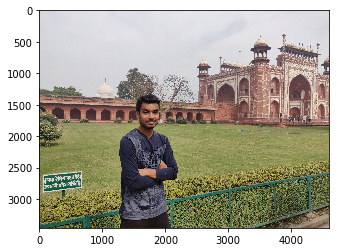

In [101]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('IMG_20190213_115915.jpg') 
  
# Output Images 
plt.imshow(img) 

In [0]:
face_locations = face_recognition.face_locations(img)

In [103]:
print(face_locations)

[(1525, 1917, 1846, 1596)]


In [0]:
top, right, bottom, left = face_locations[0]

In [0]:
face_image = img[top:bottom, left:right]

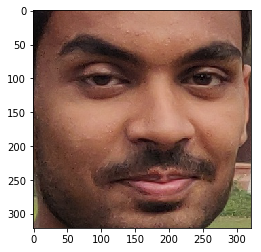

In [106]:
plt.imshow(face_image)

In [107]:
from PIL import Image

im = Image.open('IMG_20190213_115915.jpg')
width, height = im.size
print(width)
print(height)

4608
3456


In [0]:
v_len = int(abs(top-bottom)*.4)
h_len = int(abs(left-right)*.4)

top      -=  v_len
bottom   +=  v_len
left     -=  h_len
right    +=  h_len


if(top<0):
  top=0

if(bottom>height):
  bottom=height
  
if(left<0):
  left=0
  
if(right>width):
  right=width

face_image = img[top:bottom, left:right]

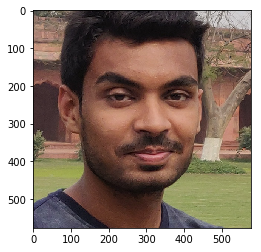

In [109]:
plt.imshow(face_image)